In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [14]:
datafiles = glob.glob('/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29*d3*')

In [15]:
datafiles.sort()

In [20]:
len(datafiles)

14

In [22]:
times = []
brightnesses = []
temperatures = []
for f in datafiles:
    x = np.loadtxt(f)
    time = x[:, 0]
    bright = x[:, 1]
    temp = x[:, 2]
    times = np.concatenate([times, time])
    brightnesses = np.concatenate([brightnesses, bright])
    temperatures = np.concatenate([temperatures, temp])

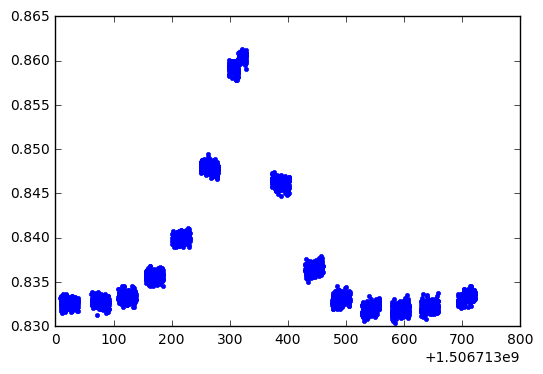

In [26]:
plot(times, brightnesses, '.')

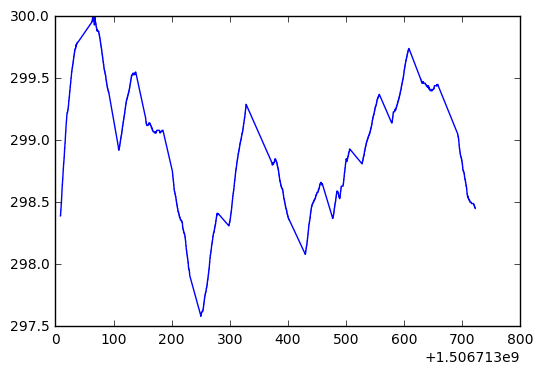

In [27]:
plot(times, temperatures)

In [34]:
datafiles

['/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:23:28skydip_0d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:24:22skydip_10d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:25:08skydip_20d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:25:55skydip_30d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:26:41skydip_40d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:27:29skydip_50d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:28:18skydip_60d3.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:29:32skydip_50d3_up.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:30:29skydip_40d3_up.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:31:16skydip_30d3_up.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:32:07skydip_20d3_up.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:32:58skydip_10d3

In [33]:
datafiles[1].split('skydip_')[-1].split('d3')[0]

'10'

In [45]:
times = []
brightnesses = []
temperatures = []
angles = []
for f in datafiles[:-1]:
    x = np.loadtxt(f)
    time = x[:, 0]
    bright = x[:, 1]
    temp = x[:, 2]
    angle = float(f.split('skydip_')[-1].split('d3')[0])
    times.append(time)
    brightnesses.append(bright)
    temperatures.append(temp)
    angles.append(angle)
times = np.array(times)
brightnesses = np.array(brightnesses)
temperatures = np.array(temperatures)
angles = np.array(angles)

In [46]:
brightnesses.shape

(13, 297)

In [51]:
mean_bright = np.mean(brightnesses, 1)

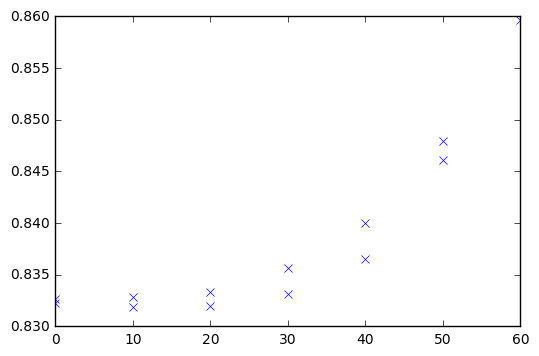

In [54]:
plot(angles, mean_bright, 'x')

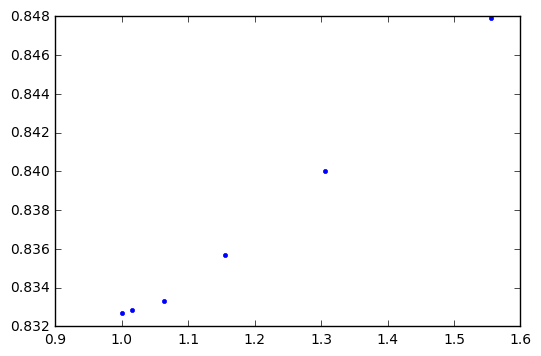

In [62]:
plot(1./np.cos(angles[:6] * np.pi / 180.), mean_bright[:6], '.')

In [64]:
k = 6
ex_angles = angles[:k]
ex_bright = mean_bright[:k]
depth = 1. / np.cos(ex_angles * np.pi / 180.)

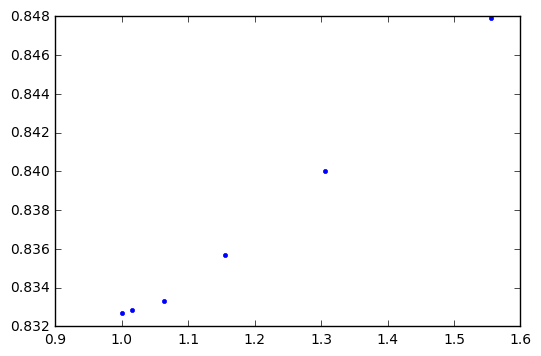

In [66]:
plot(depth, ex_bright, '.')

In [67]:
from scipy.optimize import curve_fit

In [68]:
def line(x, m, b):
    return m * x + b

In [75]:
def quad(x, a, b, c):
    return a*x**2 + b*x + c

In [82]:
optimal, errs = curve_fit(line, depth, ex_bright)

In [83]:
optimal2, errs = curve_fit(quad, depth, ex_bright)

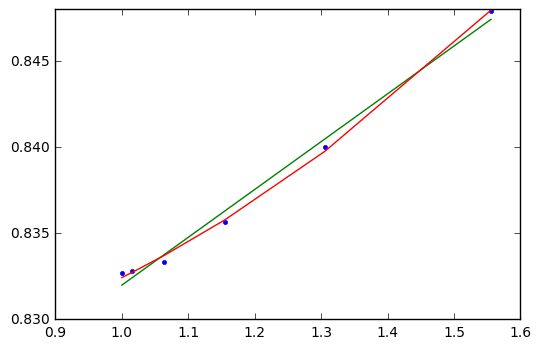

In [85]:
plot(depth, ex_bright, '.')
plot(depth, line(depth, *optimal))
plot(depth, quad(depth, *optimal2))

In [139]:
cmb_bright = optimal2[2]

In [140]:
cmb_bright

0.82908416619462988

In [99]:
#calibration

In [103]:
paddlefiles = glob.glob('/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29*paddle*')

In [104]:
paddlefiles

['/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_14:37:19skydip_0d_paddle.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_14:53:32skydip_0d2_paddle.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:11:34skydip_0d2_up_paddle.txt']

In [105]:
nitrofiles = glob.glob('/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29*nitro*')

In [106]:
nitrofiles

['/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_14:40:00skydip_0d_nitrobox.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_14:56:22skydip_0d2_nitrobox.txt',
 '/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:13:10skydip_0d2_up_nitrobox.txt']

In [107]:
boxfile = glob.glob('/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29*_box.txt')

In [108]:
boxfile

['/Users/cosmology/radiometer/ReadoutApp/Data/2017-09-29_15:18:46skydip_0d2_up_box.txt']

In [112]:
paddle_time = []
paddle_bright = []
paddle_temp = []
for pad in paddlefiles:
    x = np.loadtxt(pad)
    time = x[:, 0]
    bright = x[:, 1] * 10 
    temp = x[:, 2]
    paddle_time = np.concatenate([paddle_time, time])
    paddle_bright = np.concatenate([paddle_bright, bright])
    paddle_temp = np.concatenate([paddle_temp, temp])

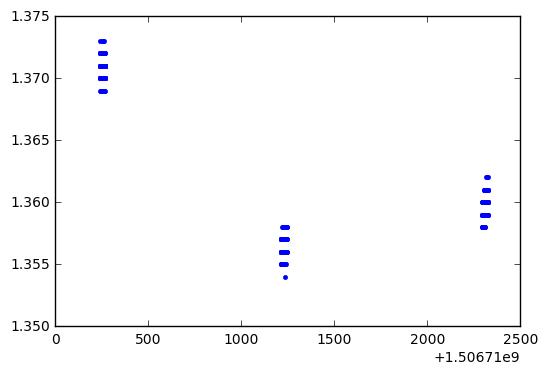

In [113]:
plot(paddle_time, paddle_bright, '.')

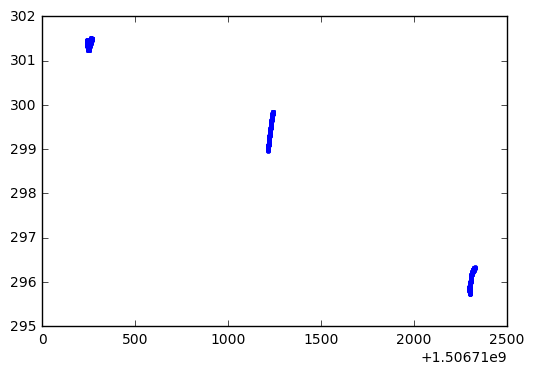

In [114]:
plot(paddle_time, paddle_temp, '.')

In [115]:
nitro_time = []
nitro_bright = []
nitro_temp = []
for nitro in nitrofiles:
    x = np.loadtxt(nitro)
    time = x[:, 0]
    bright = x[:, 1]
    temp = x[:, 2]
    nitro_time = np.concatenate([nitro_time, time])
    nitro_bright = np.concatenate([nitro_bright, bright])
    nitro_temp = np.concatenate([nitro_temp, temp])

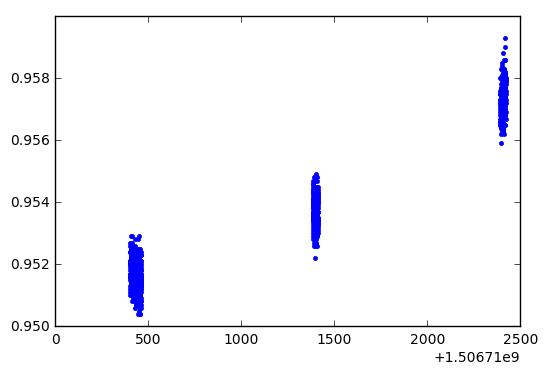

In [116]:
plot(nitro_time, nitro_bright, '.')

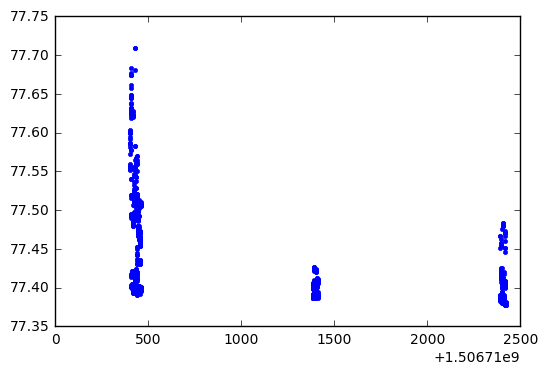

In [117]:
plot(nitro_time, nitro_temp, '.')

In [120]:
x = np.loadtxt(boxfile[0])
box_time = x[:, 0]
box_bright = x[:, 1]
box_temp = x[:, 2]

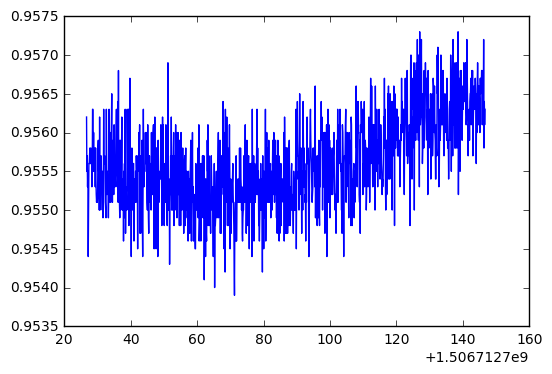

In [121]:
plot(box_time, box_bright)

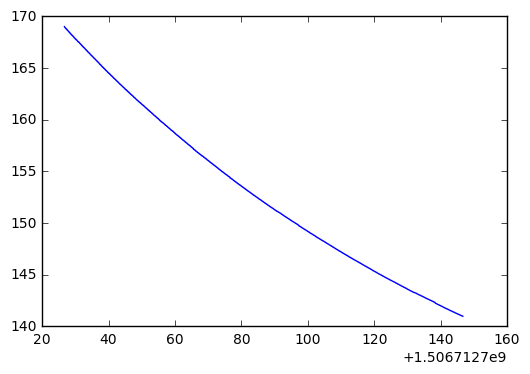

In [122]:
plot(box_time, box_temp)

In [125]:
paddle_mean_bright = []
paddle_mean_temp = []
for pad in paddlefiles:
    x = np.loadtxt(pad)
    bright = x[:, 1] * 10 
    temp = x[:, 2]
    paddle_mean_bright.append(np.mean(bright))
    paddle_mean_temp.append(np.mean(temp))
paddle_mean_bright = np.array(paddle_mean_bright)
paddle_mean_temp = np.array(paddle_mean_temp)

In [126]:
nitro_mean_bright = []
nitro_mean_temp = []
for nitro in nitrofiles:
    x = np.loadtxt(nitro)
    bright = x[:, 1]
    temp = x[:, 2]
    nitro_mean_bright.append(np.mean(bright))
    nitro_mean_temp.append(np.mean(temp))
nitro_mean_bright = np.array(nitro_mean_bright)
nitro_mean_temp = np.array(nitro_mean_temp)

In [127]:
calib_temps = np.concatenate([nitro_mean_temp, paddle_mean_temp])
calib_bright = np.concatenate([nitro_mean_bright, paddle_mean_bright])

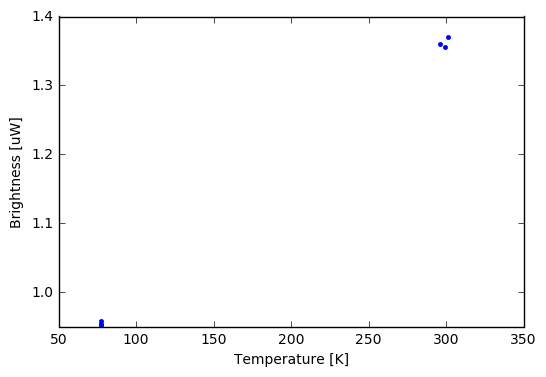

In [130]:
plot(calib_temps, calib_bright, '.')
xlabel('Temperature [K]')
ylabel('Brightness [uW]')

(0.7, 1.4)

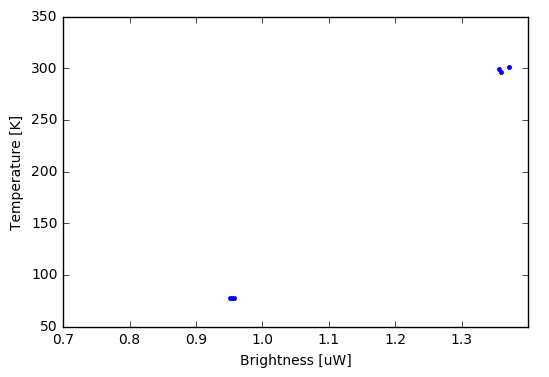

In [132]:
plot(calib_bright, calib_temps, '.')
ylabel('Temperature [K]')
xlabel('Brightness [uW]')
xlim(0.7, 1.4)

In [133]:
optimal, errs = curve_fit(line, calib_bright, calib_temps)

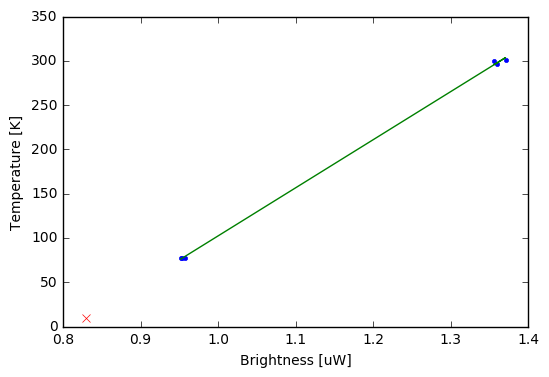

In [141]:
plot(calib_bright, calib_temps, '.')
plot(calib_bright, line(calib_bright, *optimal))
plot(cmb_bright, line(cmb_bright, *optimal), 'x')
ylabel('Temperature [K]')
xlabel('Brightness [uW]')

In [142]:
line(cmb_bright, *optimal)

9.5635414836618224

In [143]:
ls

2017-04-14 observation analysis 2.ipynb
2017-04-14 observation analysis.ipynb
2017-04-21 data analysis error prop.ipynb
2017-09-15 day 1 fun.ipynb
2017-09-29 observations!!.ipynb
BasicPlot+Analysis.ipynb
Error Propagation Master-Split Up Down.ipynb
Error Propagation Master.ipynb
Jan27 testing1.ipynb
Observation march 31.ipynb
SUs Data Manip Haxxx.ipynb
SkyDipAnalysis.ipynb
TemperatureCalibration2.ipynb
Untitled.ipynb
Untitled1.ipynb
linearity test march 31.ipynb
sep20 pyvisa.ipynb
thermo readout.ipynb


In [144]:
cd

/Users/cosmology
